___
# PROJETO 1

## <font color='red'>Henrique Mello Guazzelli</font>
___

## <font color='blue'>Ciência dos dados - Projeto 1</font>

## Introdução

   Após ler uma matéria a respeito do retorno dos aposentados ao mercado de trabalho, decidi fazer uma análise dos aposentados dos anos de 2011 e 2014 e também verificar se os fatos se comprovam realizando uma análise sobre os dados do PNAD.

http://metalrevista.com.br/2016/05/09/cresce-o-numero-de-aposentados-que-voltam-ao-mercado-de-trabalho-no-brasil/

   A matéria conclui que o retorno do aposentado à ativa pode ser relacionado com o desejo de aumentar a renda familiar, além de fatores psicossociais como a necessidade de se sentir produtivo novamente.

___
## Análise e Resultados

In [100]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os

In [101]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Henrique\Documents\semestre2-insper\CIENCIA DOS DADOS\Projeto 1


## Preparação dos DataFrames

In [102]:
#Leitura da base já em formato de DataFrame e extensão .csv
pnad2014 = pd.read_csv('PES2014.csv', sep=',')

In [103]:
#Leitura da base já em formato de DataFrame e extensão .csv
pnad2011 = pd.read_csv('PES2011.csv', sep=',')

___

In [104]:
#criando novo dataframe apenas com as colunas desejaveis e filtrando os aposentados

df14 = pnad2014[['V9122','V0302', 'V8005', 'V4704', 'V9057', 'V4838', 'V1252', 'V4721']]
df14 = df14[df14.V9122 == 2]
df11 = pnad2011[['V9122','V0302', 'V8005', 'V4704', 'V9057', 'V4838', 'V1252', 'V4721']]
df11 = df11[df11.V9122 == 2]

In [105]:
df14.shape

(38643, 8)

In [106]:
df11.shape

(34849, 8)

## Verificando se os dataframes foram lidos corretamente

In [107]:
df14.head()

,V9122,V0302,V8005,V4704,V9057,V4838,V1252,V4721
5,2,4,77,2,NaN,2,724,724
11,2,4,68,2,NaN,2,724,3422
25,2,2,65,1,1,2,724,4724
26,2,4,62,2,NaN,5,2500,4724
51,2,2,90,2,NaN,1,724,2224


In [108]:
df11.head()

,V9122,V0302,V8005,V4704,V9057,V4838,V1252,V4721
15,2,4,67,2,NaN,2,3000,6000
16,2,2,89,2,NaN,2,545,4300
17,2,4,72,2,NaN,3,545,4300
22,2,2,61,2,NaN,3,900,2200
45,2,4,70,2,NaN,1,545,1490


In [109]:
df14.V0302 = df14.V0302.astype('category')
df14.V0302.cat.categories = ('Masculino', 'Feminino')

df11.V0302 = df11.V0302.astype('category')
df11.V0302.cat.categories = ('Masculino', 'Feminino')

df14.V9122 = df14.V9122.astype('category')
df14.V9122.cat.categories = ('Sim')

df11.V9122 = df11.V9122.astype('category')
df11.V9122.cat.categories = ('Sim')

df14.V4838 = df14.V4838.astype('category')
df14.V4838.cat.categories = ('Menos de um ano', '1 a 3 anos', '4 a 7 anos', '8 a 10 anos', '11 a 14 anos', '15 anos ou mais', 'Não determinado')

df11.V4838 = df11.V4838.astype('category')
df11.V4838.cat.categories = ('Menos de um ano', '1 a 3 anos', '4 a 7 anos', '8 a 10 anos', '11 a 14 anos', '15 anos ou mais', 'Não determinado')

df14.V4704 = df14.V4704.astype('category')
df14.V4704.cat.categories = ('Economicamente ativas', 'Não economicamente ativas')

df11.V4704 = df11.V4704.astype('category')
df11.V4704.cat.categories = ('Economicamente ativas', 'Não economicamente ativas')

df14.V9057 = df14.V9057.astype('category')
df14.V9057.cat.categories = ('Até 30 minutos', 'Mais de 30 até 1 hora', 'Mais de 1 até 2 horas', 'Mais de 2 horas')

df11.V9057 = df11.V9057.astype('category')
df11.V9057.cat.categories = ('Até 30 minutos', 'Mais de 30 até 1 hora', 'Mais de 1 até 2 horas', 'Mais de 2 horas')

## Veiricando a tradução dos dicionários aos dataframes

In [110]:
df14.head()

,V9122,V0302,V8005,V4704,V9057,V4838,V1252,V4721
5,Sim,Feminino,77,Não economicamente ativas,NaN,1 a 3 anos,724,724
11,Sim,Feminino,68,Não economicamente ativas,NaN,1 a 3 anos,724,3422
25,Sim,Masculino,65,Economicamente ativas,Até 30 minutos,1 a 3 anos,724,4724
26,Sim,Feminino,62,Não economicamente ativas,NaN,11 a 14 anos,2500,4724
51,Sim,Masculino,90,Não economicamente ativas,NaN,Menos de um ano,724,2224


In [111]:
df14.columns = ['Aposentado', 'Sexo', 'Idade','Ativo', 'Tempo da residencia ate o trabalho' ,'Anos de estudo', 'Valor da aposentadoria(R$)', 'Rendimento domiciliar(R$)']
df14.head()

,Aposentado,Sexo,Idade,Ativo,Tempo da residencia ate o trabalho,Anos de estudo,Valor da aposentadoria(R$),Rendimento domiciliar(R$)
5,Sim,Feminino,77,Não economicamente ativas,NaN,1 a 3 anos,724,724
11,Sim,Feminino,68,Não economicamente ativas,NaN,1 a 3 anos,724,3422
25,Sim,Masculino,65,Economicamente ativas,Até 30 minutos,1 a 3 anos,724,4724
26,Sim,Feminino,62,Não economicamente ativas,NaN,11 a 14 anos,2500,4724
51,Sim,Masculino,90,Não economicamente ativas,NaN,Menos de um ano,724,2224


In [112]:
df11.columns = ['Aposentado', 'Sexo', 'Idade','Ativo', 'Tempo da residencia ate o trabalho' ,'Anos de estudo', 'Valor da aposentadoria(R$)', 'Rendimento domiciliar(R$)']
df11.head()

,Aposentado,Sexo,Idade,Ativo,Tempo da residencia ate o trabalho,Anos de estudo,Valor da aposentadoria(R$),Rendimento domiciliar(R$)
15,Sim,Feminino,67,Não economicamente ativas,NaN,1 a 3 anos,3000,6000
16,Sim,Masculino,89,Não economicamente ativas,NaN,1 a 3 anos,545,4300
17,Sim,Feminino,72,Não economicamente ativas,NaN,4 a 7 anos,545,4300
22,Sim,Masculino,61,Não economicamente ativas,NaN,4 a 7 anos,900,2200
45,Sim,Feminino,70,Não economicamente ativas,NaN,Menos de um ano,545,1490


## Comparando a porcentagem dos sexos para os anos 2014 e 2011

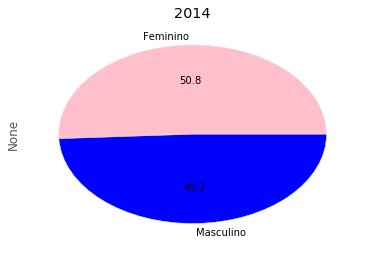

In [148]:
plot = df14.Sexo.value_counts(True).plot(kind='pie', colors=('pink', 'blue'),autopct="%.1f",title='2014')

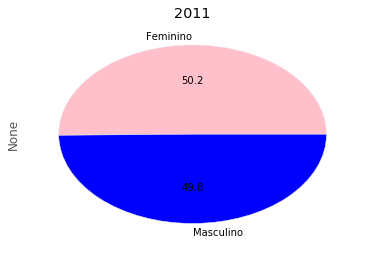

In [149]:
plot = df11.Sexo.value_counts(True).plot(kind='pie', colors=('pink', 'blue'),autopct="%.1f",title='2011')

Analisando os gráficos pode-se perceber que a porcentagem de mulheres aposentadas aumentou e consequentemente a dos homens regrediu

## Analisando a idade dos aposentados em 2014 e 2011

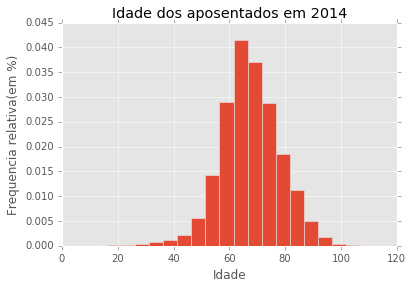

In [150]:
plot = df14.Idade.plot(kind='hist', normed='1', bins=20, title='Idade dos aposentados em 2014')
x = plt.xlabel('Idade')
y = plt.ylabel('Frequencia relativa(em %)')

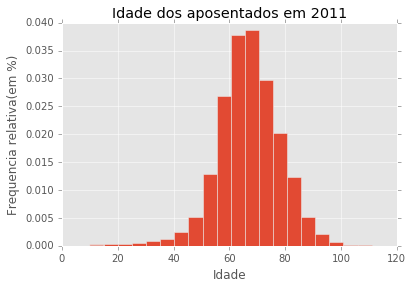

In [152]:
plot = df11.Idade.plot(kind='hist', normed='1', bins=20, title='Idade dos aposentados em 2011')
x = plt.xlabel('Idade')
y = plt.ylabel('Frequencia relativa(em %)')

count    38643.000000
mean        67.386952
std         10.574217
min         11.000000
25%         61.000000
50%         67.000000
75%         74.000000
max        112.000000
Name: Idade, dtype: float64

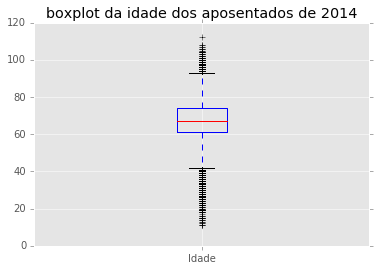

In [153]:
df14.Idade.plot(kind='box', title='boxplot da idade dos aposentados de 2014')
df14.Idade.describe()

A partir do boxplot da idade dos aposentados de 2014 é possível perceber que 50% dos aposentados se concentram entre os 61 e 74 anos de idade enquanto a média é de aproximadamente 67,4 anos e a mediana é 67 anos.

count    34849.000000
mean        66.817785
std         11.078108
min         10.000000
25%         60.000000
50%         67.000000
75%         74.000000
max        111.000000
Name: Idade, dtype: float64

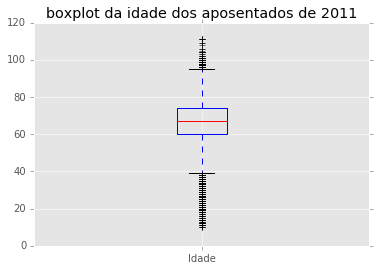

In [154]:
df11.Idade.plot(kind='box', title='boxplot da idade dos aposentados de 2011')
df11.Idade.describe()

A partir do boxplot da idade dos aposentados de 2011 é possível perceber que 50% dos aposentados se concentram entre os 60 e 74 anos de idade enquanto a média é de aproximadamente 66,8 anos e a mediana 67.

Como passaram-se 3 anos entre uma pesquisa e outra e os menores valores das concentrações de 50% (1º Quartil) aumentou somente 1 ano, é possível deduzir que mais pessoas se aposentaram em 2014 do que 2011

## Os gráficos abaixo representam o número de pessoas economicamente ativas e não economicamente ativas e suas respectivas porcentagens

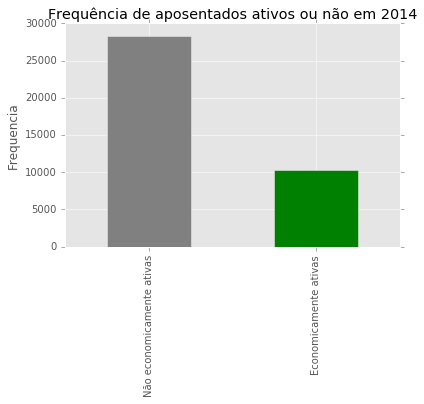

In [164]:
plot = df14.Ativo.value_counts().plot(kind='bar',alpha=1, color=('grey','green'), title='Frequência de aposentados ativos ou não em 2014')
y = plt.ylabel('Frequencia')

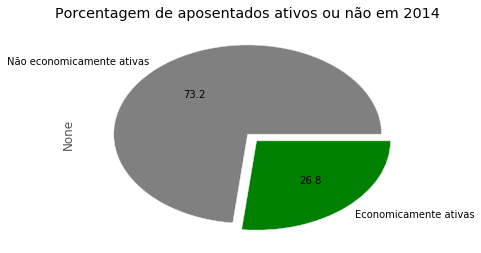

In [163]:
explode = (0,0.1)
plot = df14.Ativo.value_counts(True).plot(kind='pie', colors=('grey','green'),explode=explode, autopct='%.1f',title='Porcentagem de aposentados ativos ou não em 2014')

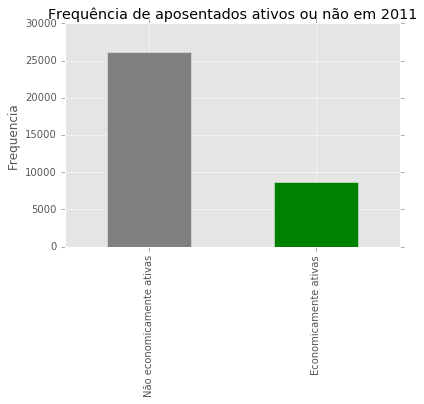

In [178]:
plot = df11.Ativo.value_counts().plot(kind='bar',alpha=1, color=('grey','green'), title='Frequência de aposentados ativos ou não em 2011')
y = plt.ylabel('Frequencia')

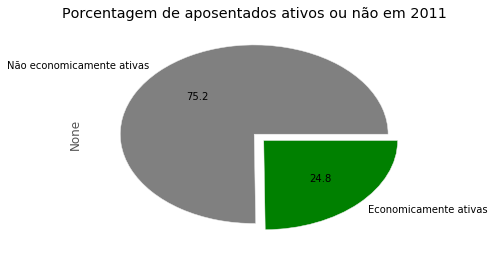

In [161]:
explode = (0,0.1)
plot = df11.Ativo.value_counts(True).plot(kind='pie', colors=('grey','green'),explode=explode, autopct='%.1f',title='Porcentagem de aposentados ativos ou não em 2011')

Os gráficos acima deixam claro que o número, assim como a porcentagem, de aposentados ativos aumentou de 2011 para 2014.

## Analisando o tempo que os aposentados levam da residência até o trabalho 

<bound method Series.count of Até 30 minutos           0.087855
Mais de 30 até 1 hora    0.023627
Mais de 1 até 2 horas    0.007349
Mais de 2 horas          0.002717
dtype: float64>

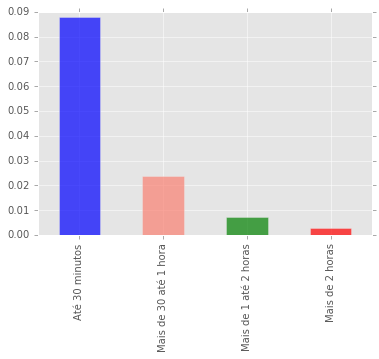

In [185]:
plot = df14["Tempo da residencia ate o trabalho"].value_counts(True).plot(kind='bar',alpha=0.7, color=('blue', 'salmon', 'green', 'red'))
df14["Tempo da residencia ate o trabalho"].value_counts(True).count

<bound method Series.count of Até 30 minutos           0.079514
Mais de 30 até 1 hora    0.022526
Mais de 1 até 2 horas    0.007231
Mais de 2 horas          0.001923
dtype: float64>

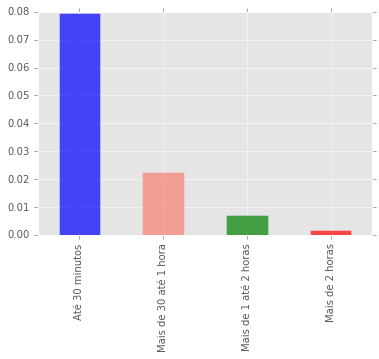

In [180]:
plot = df11["Tempo da residencia ate o trabalho"].value_counts(True).plot(kind='bar',alpha=0.7, color=('blue', 'salmon', 'green', 'red'))
df11["Tempo da residencia ate o trabalho"].value_counts(True).count

Analisando esses gráficos percebe-se novamente que os aposentados estão se esforçando mais e voltando para a ativa e embora o maior acréscimo seja no tempo 'até 30 minutos', os outros tempos também aumentaram.

## Abaixo estão os gráficos da aposentadoria em reais para os anos de 2014 e 2011

#### Esses gráficos serão representados apenas por curiosidade, mais tarde iremos cruzar esses dados com os valores de aposentados ativos e inativos para ver se esses podem ser relacionados.

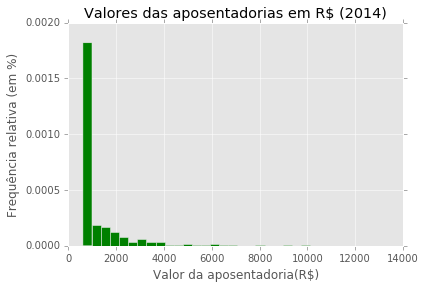

In [191]:
plot = df14["Valor da aposentadoria(R$)"][(df14["Valor da aposentadoria(R$)"]!=999999999999) & (df14["Valor da aposentadoria(R$)"]<=12000)].plot(kind='hist',bins=30,normed=1,alpha=1,color=('green'),title='Valores das aposentadorias em R$ (2014)')
y = plt.ylabel('Frequência relativa (em %)')
x = plt.xlabel('Valor da aposentadoria(R$)')

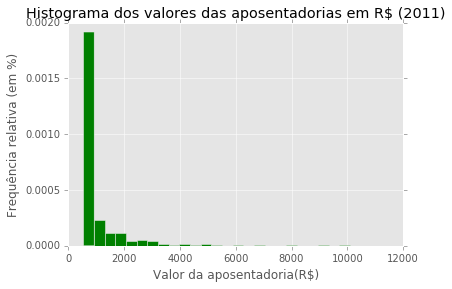

In [195]:
plot = df11["Valor da aposentadoria(R$)"][(df11["Valor da aposentadoria(R$)"]!=999999999999) & (df11["Valor da aposentadoria(R$)"]<=12000)].plot(kind='hist',bins=30,normed=1,alpha=1,color=('green'),title='Histograma dos valores das aposentadorias em R$ (2011)')
y = plt.ylabel('Frequência relativa (em %)')
x = plt.xlabel('Valor da aposentadoria(R$)')

## Abaixo estão os gráficos do rendimento mensal domiciliar em reais para os anos de 2014 e 2011

#### Assim como os gráficos dos valores das aposentadorias, esses gráficos serão representados apenas por curiosidade, mais tarde iremos cruzar esses dados com os valores de aposentados ativos e inativos para ver se esses podem ser relacionados. O gráfico que será obtido irá justificar o argumento apresentado na pesquisa de referência, que justifica o aumento de aposentados ativos afim de aumentar o rendimento familiar.

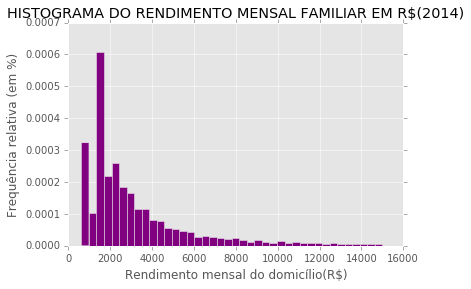

In [198]:
plot = df14["Rendimento domiciliar(R$)"][(df14["Rendimento domiciliar(R$)"]!=999999999999)& (df14["Rendimento domiciliar(R$)"]<=15000)].plot(kind='hist',bins=40,normed=1,alpha=1,color=('purple'), title='HISTOGRAMA DO RENDIMENTO MENSAL FAMILIAR EM R$(2014)')
y = plt.ylabel('Frequência relativa (em %)')
x = plt.xlabel('Rendimento mensal do domicílio(R$)')

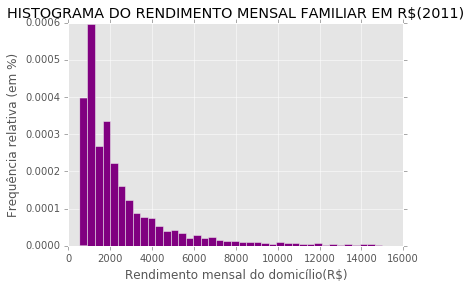

In [200]:
plot = df11["Rendimento domiciliar(R$)"][(df11["Rendimento domiciliar(R$)"]!=999999999999)& (df11["Rendimento domiciliar(R$)"]<=15000)].plot(kind='hist',bins=40,normed=1,alpha=1,color=('purple'), title='HISTOGRAMA DO RENDIMENTO MENSAL FAMILIAR EM R$(2011)')
y = plt.ylabel('Frequência relativa (em %)')
x = plt.xlabel('Rendimento mensal do domicílio(R$)')

## Agora serão cruzados os dados de sexo e atividade dos aposentados de 2014 e 2011

In [124]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

### 2014

In [125]:
ct1=pd.crosstab(df14.Sexo,df14.Ativo,margins=True,rownames=['Sexo'], colnames=['Ativo'])
ct1=ct1.loc[['Feminino','Masculino', 'All']]
ct1

Ativo,Economicamente ativas,Não economicamente ativas,All
Sexo,,,
Feminino,4171,15457,19628
Masculino,6176,12839,19015
All,10347,28296,38643


In [126]:
ct2=(ct1/len(df14)*100).round(decimals=0)
ct2

,Economicamente ativas,Não economicamente ativas,All
Sexo,,,
Feminino,11,40,51
Masculino,16,33,49
All,27,73,100


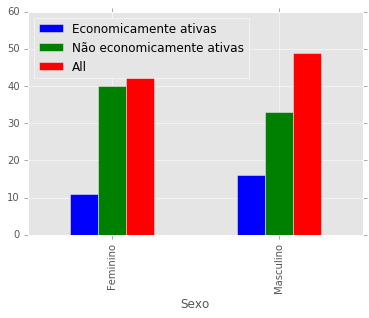

In [127]:
ct2 = pd.crosstab(df14.Sexo,df14.Ativo,margins=True,rownames=['Sexo'], colnames=['Ativo'])
ct2 = ct2.loc[['Feminino', 'Masculino', 'All']]
ct2 = (ct2/len(df14)*100).round(decimals=0)
ct2 = ct2.iloc[0:2,]
plot = ct2.plot(kind='bar')

In [128]:
ct3=pd.crosstab(df14.Sexo,df14.Ativo,margins=True,rownames=['Sexo'], colnames=['Ativo']).apply(percConvert, axis=1)
ct3=ct3.loc[['Feminino', 'Masculino', 'All']]
ct3

Ativo,Economicamente ativas,Não economicamente ativas,All
Sexo,,,
Feminino,21,79,100
Masculino,32,68,100
All,27,73,100


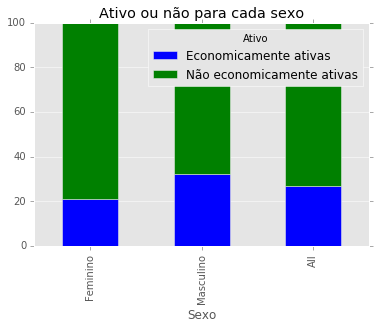

In [129]:
ct3 = pd.crosstab(df14.Sexo,df14.Ativo,margins=True,rownames=['Sexo'], colnames=['Ativo']).apply(percConvert, axis=1)
ct3 = ct3.loc[['Feminino', 'Masculino', 'All']]
ct3 = ct3.iloc[:,0:2]
plot = ct3.plot(kind='bar', stacked=True,title='Ativo ou não para cada sexo')

### 2011

In [202]:
ct1=pd.crosstab(df11.Sexo,df11.Ativo,margins=True,rownames=['Sexo'], colnames=['Ativo'])
ct1=ct1.loc[['Feminino','Masculino', 'All']]
ct1

Ativo,Economicamente ativas,Não economicamente ativas,All
Sexo,,,
Feminino,3268,14223,17491
Masculino,5382,11976,17358
All,8650,26199,34849


In [203]:
ct2=(ct1/len(df11)*100).round(decimals=0)
ct2

,Economicamente ativas,Não economicamente ativas,All
Sexo,,,
Feminino,9,41,50
Masculino,15,34,50
All,25,75,100


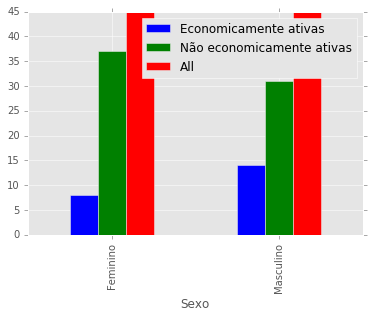

In [204]:
ct2 = pd.crosstab(df11.Sexo,df11.Ativo,margins=True,rownames=['Sexo'], colnames=['Ativo'])
ct2 = ct2.loc[['Feminino', 'Masculino', 'All']]
ct2 = (ct2/len(df14)*100).round(decimals=0)
ct2 = ct2.iloc[0:2,]
plot = ct2.plot(kind='bar')

In [205]:
ct3=pd.crosstab(df11.Sexo,df11.Ativo,margins=True,rownames=['Sexo'], colnames=['Ativo']).apply(percConvert, axis=1)
ct3=ct3.loc[['Feminino', 'Masculino', 'All']]
ct3

Ativo,Economicamente ativas,Não economicamente ativas,All
Sexo,,,
Feminino,19,81,100
Masculino,31,69,100
All,25,75,100


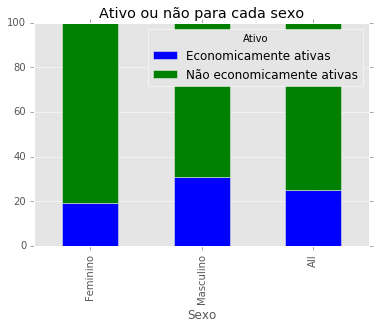

In [206]:
ct3 = pd.crosstab(df11.Sexo,df11.Ativo,margins=True,rownames=['Sexo'], colnames=['Ativo']).apply(percConvert, axis=1)
ct3 = ct3.loc[['Feminino', 'Masculino', 'All']]
ct3 = ct3.iloc[:,0:2]
plot = ct3.plot(kind='bar', stacked=True,title='Ativo ou não para cada sexo')

A pesquisa de referência aponta a questão do aposentado ainda ser o responsável da casa. Embora as mulheres tenham obtido muito espaço no mercado de trabalho, normalmente, os homens ainda são os maiores responsáveis financeiros da casa.
Com esses gráficos, quis verificar se os homens são a maioria ativa. Observando as análises acima, é possível perceber que tanto em 2014 como em 2011 a maioria ativa é masculina.
Contudo, 903 mulheres aposentadas entraram a ativa entre 2011 e 2014 enquanto apenas 794 homens também entraram a ativa. Portanto, embora os homens ainda sejam maioria na ativa, os dados mostram como as mulheres estão buscando seu espaço no mercado de trabalho.

## Tabelas e gráficos cruzados (anos de estudo x atividade no mercado de trabalho)

#### Com as análises abaixo, tento encontrar uma relação entre anos de estudo e atividade econômica

### 2014

In [208]:
ct1=pd.crosstab(df14['Anos de estudo'],df14.Ativo,margins=True,rownames=['Anos de estudo'], colnames=['Ativo'])
ct1=ct1.loc[['Menos de um ano', '1 a 3 anos', '4 a 7 anos', '8 a 10 anos', '11 a 14 anos', '15 anos ou mais', 'Não determinado', 'All']]
ct1

Ativo,Economicamente ativas,Não economicamente ativas,All
Anos de estudo,,,
Menos de um ano,2438,7389,9827
1 a 3 anos,1683,4450,6133
4 a 7 anos,2554,7114,9668
8 a 10 anos,872,2500,3372
11 a 14 anos,1504,4214,5718
15 anos ou mais,1291,2614,3905
Não determinado,5,15,20
All,10347,28296,38643


In [209]:
ct2=(ct1/len(df14)*100).round(decimals=0)
ct2

,Economicamente ativas,Não economicamente ativas,All
Anos de estudo,,,
Menos de um ano,6,19,25
1 a 3 anos,4,12,16
4 a 7 anos,7,18,25
8 a 10 anos,2,6,9
11 a 14 anos,4,11,15
15 anos ou mais,3,7,10
Não determinado,0,0,0
All,27,73,100


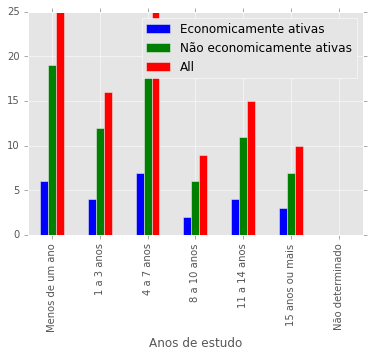

In [210]:
ct2 = pd.crosstab(df14['Anos de estudo'],df14.Ativo,margins=True,rownames=['Anos de estudo'], colnames=['Ativo'])
ct2 = ct2.loc[['Menos de um ano', '1 a 3 anos', '4 a 7 anos', '8 a 10 anos', '11 a 14 anos', '15 anos ou mais', 'Não determinado', 'All']]
ct2 = (ct2/len(df14)*100).round(decimals=0)
ct2 = ct2.iloc[0:7,]
plot = ct2.plot(kind='bar')

### 2011

In [214]:
ct1=pd.crosstab(df11['Anos de estudo'],df11.Ativo,margins=True,rownames=['Anos de estudo'], colnames=['Ativo'])
ct1=ct1.loc[['Menos de um ano', '1 a 3 anos', '4 a 7 anos', '8 a 10 anos', '11 a 14 anos', '15 anos ou mais', 'Não determinado', 'All']]
ct1

Ativo,Economicamente ativas,Não economicamente ativas,All
Anos de estudo,,,
Menos de um ano,2361,7925,10286
1 a 3 anos,1324,3904,5228
4 a 7 anos,2154,6324,8478
8 a 10 anos,689,2322,3011
11 a 14 anos,1131,3678,4809
15 anos ou mais,988,2037,3025
Não determinado,3,9,12
All,8650,26199,34849


In [215]:
ct2=(ct1/len(df11)*100).round(decimals=0)
ct2

,Economicamente ativas,Não economicamente ativas,All
Anos de estudo,,,
Menos de um ano,7,23,30
1 a 3 anos,4,11,15
4 a 7 anos,6,18,24
8 a 10 anos,2,7,9
11 a 14 anos,3,11,14
15 anos ou mais,3,6,9
Não determinado,0,0,0
All,25,75,100


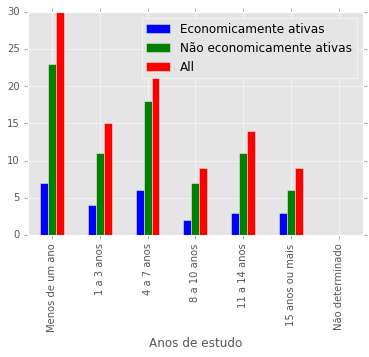

In [216]:
ct2 = pd.crosstab(df11['Anos de estudo'],df11.Ativo,margins=True,rownames=['Anos de estudo'], colnames=['Ativo'])
ct2 = ct2.loc[['Menos de um ano', '1 a 3 anos', '4 a 7 anos', '8 a 10 anos', '11 a 14 anos', '15 anos ou mais', 'Não determinado', 'All']]
ct2 = (ct2/len(df11)*100).round(decimals=0)
ct2 = ct2.iloc[0:7,]
plot = ct2.plot(kind='bar')

Pode-se então concluir que os anos de estudo e a atividade econômica não apresenta muita correlação.
Porém, dividindo as análises dos três primeiros grupos e dos três últimos grupos em 2 grupos diferentes, respectivamente denominados 1 e 2(para uma melhor didática), observa-se que o grupo 1 apresenta maior número de pessoas economicamente ativas em ambos os casos de 2011 e 2014. Com isso, pode-se concluir que as o grupo 1 (que estudou menos), provavelmente arrecadou menos dinheiro ao longo de sua vida econômica e por isso, precisa voltar à ativa para conseguir viver com uma condição atual de vida melhor. 

In [222]:
df14["Rendimento domiciliar(R$)"].describe()

count    3.861400e+04
mean     4.529446e+10
std      2.079519e+11
min      6.220000e+02
25%      1.448000e+03
50%      2.398000e+03
75%      4.572000e+03
max      1.000000e+12
Name: Rendimento domiciliar(R$), dtype: float64

In [223]:
faixa=np.arange(1.448000e+03,4.572000e+03,5.000000e+02)
df14.renddf14 = df14["Rendimento domiciliar(R$)"][(df14["Rendimento domiciliar(R$)"]>=1.448000e+03)&(df14["Rendimento domiciliar(R$)"]<=4.572000e+03)]
a = df14.renddf14.value_counts()
df14.renddf14 = pd.cut(df14.renddf14, faixa)

count            17842
unique               6
top       (1448, 1948]
freq              4557
Name: Rendimento domiciliar(R$), dtype: object

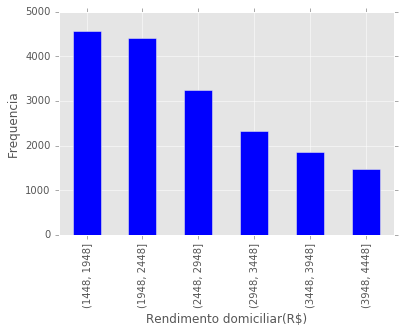

In [224]:
plot = df14.renddf14.value_counts().plot(kind='bar')
x = plt.xlabel("Rendimento domiciliar(R$)")
y = plt.ylabel('Frequencia')
df14.renddf14.describe()

In [225]:
ct1=pd.crosstab(a,df14.Ativo,margins=True,rownames=["Rendimento domiciliar(R$)"], colnames=['Ativo'])
ct1=ct1.loc[['(1448, 1948]','(1948, 2448]','(2448, 2948]','(2948, 3448]','(3448, 3948]','(3948, 4448]', 'All']]
ct1

Ativo,Economicamente ativas,Não economicamente ativas,All
Rendimento domiciliar(R$),,,
"(1448, 1948]",NaN,NaN,NaN
"(1948, 2448]",NaN,NaN,NaN
"(2448, 2948]",NaN,NaN,NaN
"(2948, 3448]",NaN,NaN,NaN
"(3448, 3948]",NaN,NaN,NaN
"(3948, 4448]",NaN,NaN,NaN
All,10347,28296,40447


In [245]:
#df14_RM = df14["Rendimento domiciliar(R$)"][(df14["Rendimento domiciliar(R$)"]!=999999999999)&(~df14["Rendimento domiciliar(R$)"].isnull())]
#df14_VA = df14["Valor da aposentadoria(R$)"][(df14["Valor da aposentadoria(R$)"]!=999999999999)&(~df14["Rendimento domiciliar(R$)"].isnull())]                                                                 
                                                                                                                                      
#def scatter_and_line(dataframe, column1, column2):
#    """ Recebe um dataframe e o nome de suas duas colunas, e faz
#        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='blue')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    """

#a = plt.scatter(df14_RM, df14_VA)
    
#scatter_and_line(df14, df14_RM, df14_VA)

IndentationError: unexpected indent (<ipython-input-245-da50bf7a5527>, line 7)

# Conclusão

Embora não tenha conseguido plotar o gráfico de 'Rendimento Domiciliar' x 'Atividade econômica' que esclareceria o argumento de que os aposentados estão voltando a ativa para aumentar a renda domiciliar, consegui validar que o número de aposentados ativos tem aumentado. Validei também que os principais responsáveis pela renda familiar(atualmente os homens) são a maioria quanto a atividade no mercado de trabalho. Outra conclusão diz a respeito das horas de estudo e a atividade econômica, o grupo de aposentados com menos anos de estudo é mais ativo, isso talvez se deve porque esse grupo arrecadou menos dinheiro ao longo da vida e teve uma poupança menor.